In [1]:
import h5py as h5  #for handling data format
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def restrict(df, col, lower_limit, upper_limit):
    mask = (df[col] >= lower_limit) & (df[col] <= upper_limit)
    return df[mask]

In [3]:
def load_data(filename, mode):
    data = h5.File(filename)
    SP = data[mode + '_System_Parameters']
    
    if mode == 'BSE': 
        df = pd.DataFrame({
            'L1': SP['Luminosity(1)'][()],
            'L2': SP['Luminosity(2)'][()],
            'Teff1': SP['Teff(1)'][()],
            'Teff2': SP['Teff(2)'][()],
            'type1': SP['Stellar_Type(1)'][()],
            'type2': SP['Stellar_Type(2)'][()]
        })
            
    else:
        df = pd.DataFrame({
           'L': SP['Luminosity'][()],
           'Teff': SP['Teff'][()],
           'type': SP['Stellar_Type'][()]
        })

    return df

In [25]:
def plot_results(filename, Z, Age, other_info = ''):
    data = h5.File(filename)
    SP = data['BSE_System_Parameters']
    SP_df = pd.DataFrame({
                'L1': SP['Luminosity(1)'][()],
                'L2': SP['Luminosity(2)'][()],
                'Teff1': SP['Teff(1)'][()],
                'Teff2': SP['Teff(2)'][()],
                'type1': SP['Stellar_Type(1)'][()],
                'type2': SP['Stellar_Type(2)'][()],
                'Init_SemiMajorAxis': SP['SemiMajorAxis@ZAMS'][()],
                'Merger': SP['Merger'][()],
                'Mass_ZAMS1': SP['Mass@ZAMS(1)'][()],
                'Mass_ZAMS2': SP['Mass@ZAMS(2)'][()]
            })
    merger_SP_df = restrict(SP_df, 'Merger', 1, 1)
    MS_merger_SP_df = restrict(restrict(SP_df, 'Merger', 1, 1), 'type1', 0, 1)
    print('Total merger fraction: ', merger_SP_df.shape[0]/SP_df.shape[0])
    print('MS merger fraction: ', MS_merger_SP_df.shape[0]/SP_df.shape[0])


    ax = sns.displot(MS_merger_SP_df, x="Init_SemiMajorAxis") #kind="kde")
    ax.set(xlabel='Semi-major axis at ZAMS (AU)', ylabel='Count', title='Initial distribution of MS mergers')

    MS_merger_SP_df.loc[:, "q"] = MS_merger_SP_df.Mass_ZAMS2 / MS_merger_SP_df.Mass_ZAMS1
    ax = sns.displot(MS_merger_SP_df, x="q") #kind="kde")
    ax.set(xlabel='Mass ratio (M2/M1)', ylabel='Count', title='Initial distribution of MS mergers')


    merger_progenitor = restrict(restrict(SP_df, 'type1', 0, 1), 'type2', 0, 1) 
    plt.figure(figsize=(8,7))
    plt.scatter(merger_progenitor.Teff1, merger_progenitor.L1, label = 'Primary', s = 1)
    plt.scatter(merger_progenitor.Teff2, merger_progenitor.L2, label = 'Secondary', s = 1)
    plt.scatter(MS_merger_SP_df.Teff1, MS_merger_SP_df.L1, label = 'Merger product', s = 1)
    plt.gca().invert_xaxis()
    plt.title('Main Sequence HRD: Z = ' + str(Z) + ', Age (Myr) = '+ str(Age) + other_info)
    plt.xlabel('Effective temperature (K)')
    plt.ylabel('Luminosity (Lsun)')
    plt.yscale('log')
    plt.legend()

    return

print(SP['SemiMajorAxis@ZAMS'].attrs['units'])

Total merger fraction:  0.4189
MS merger fraction:  0.095


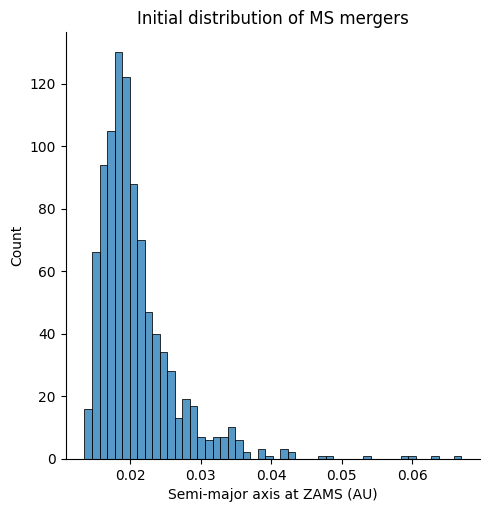

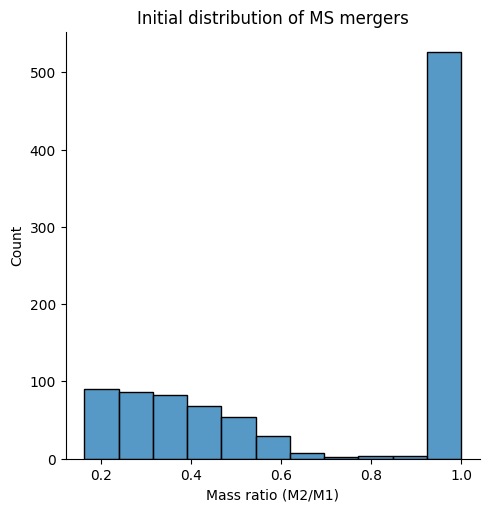

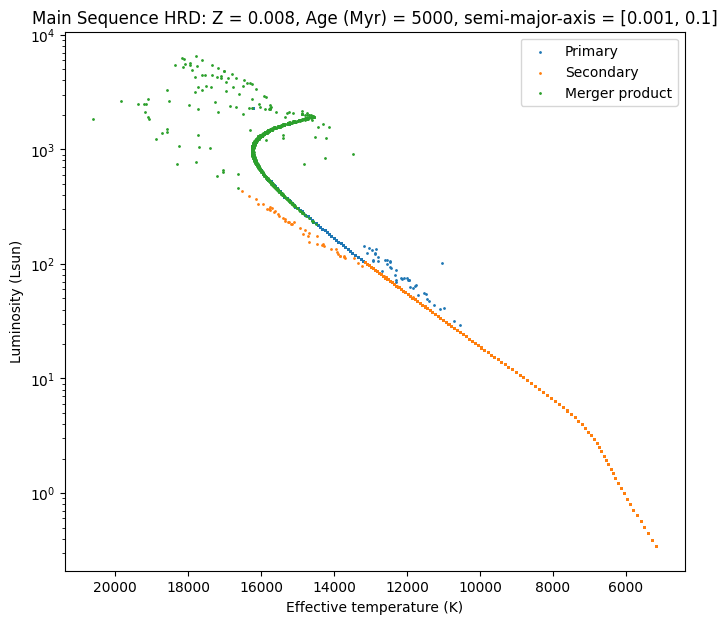

In [26]:
plot_results('COMPAS_Output_M0.8to3to6_80Myr.h5', 0.008, 5000, other_info = ', semi-major-axis = [0.001, 0.1]')

Total merger fraction:  0.001001001001001001
MS merger fraction:  0.0


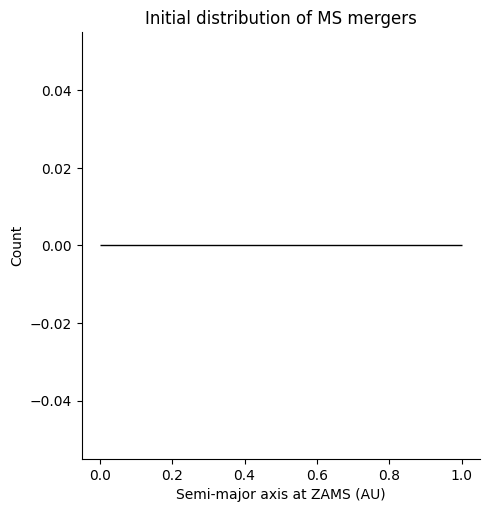

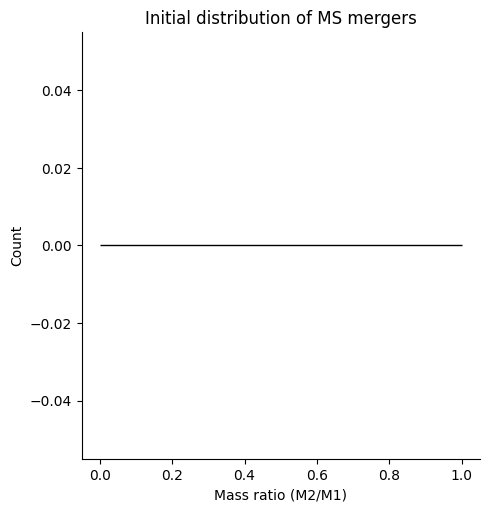

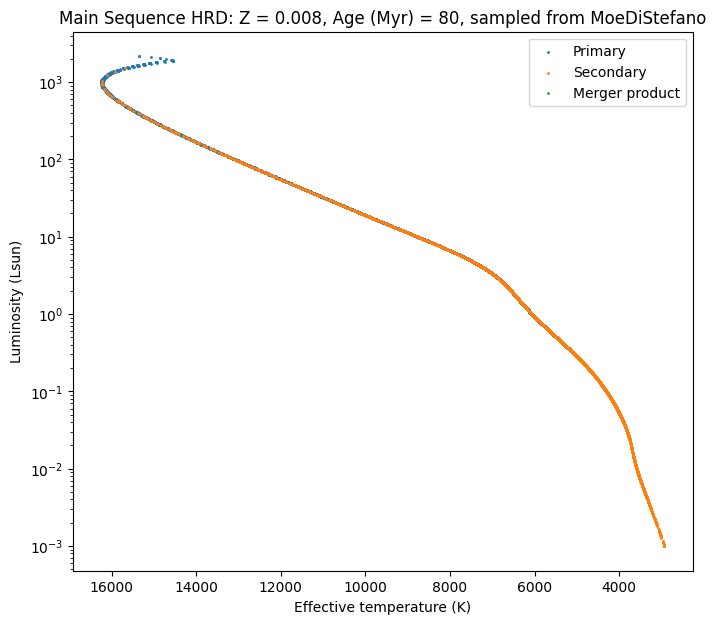

In [27]:
plot_results('COMPAS_Output_sampled.h5', 0.008, 80, other_info = ', sampled from MoeDiStefano')

Total merger fraction:  0.07317317317317318
MS merger fraction:  0.0


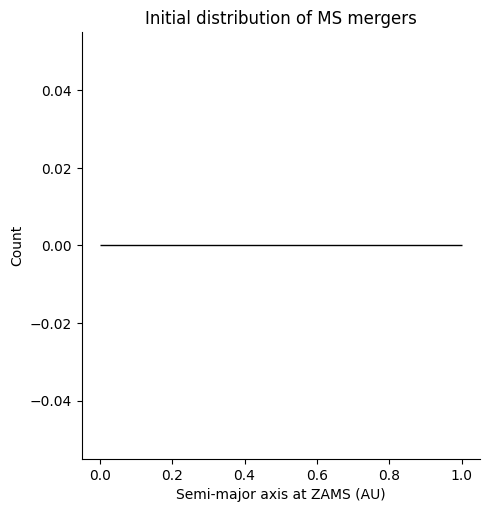

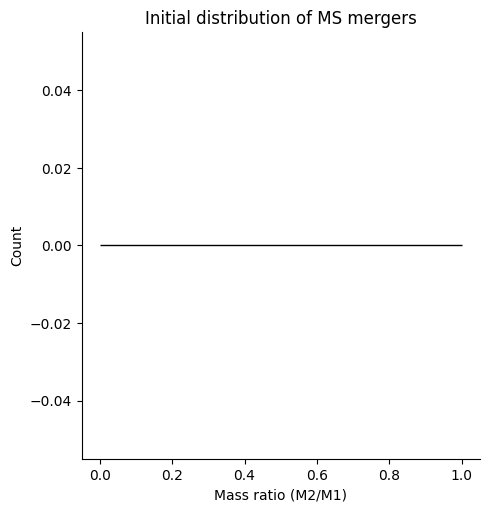

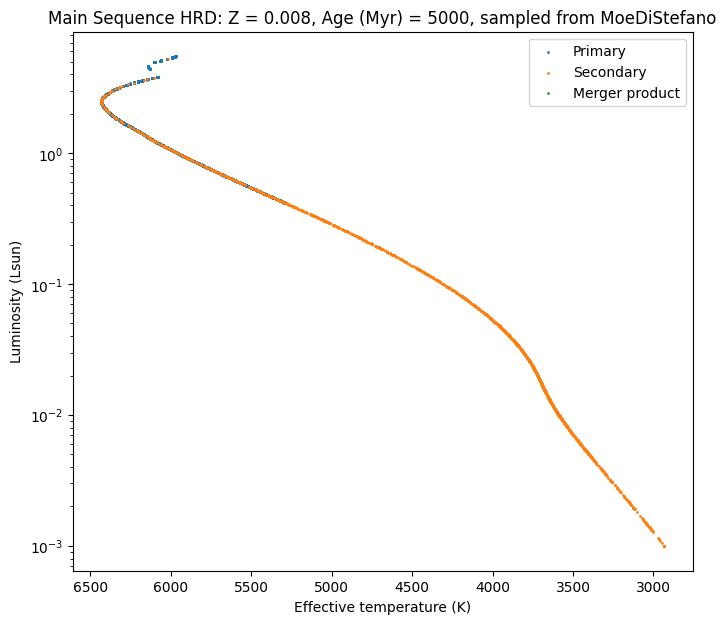

In [28]:
plot_results('COMPAS_Output_sampled_5Gyr.h5', 0.008, 5000, other_info = ', sampled from MoeDiStefano')

Total merger fraction:  0.08308308308308308
MS merger fraction:  0.0


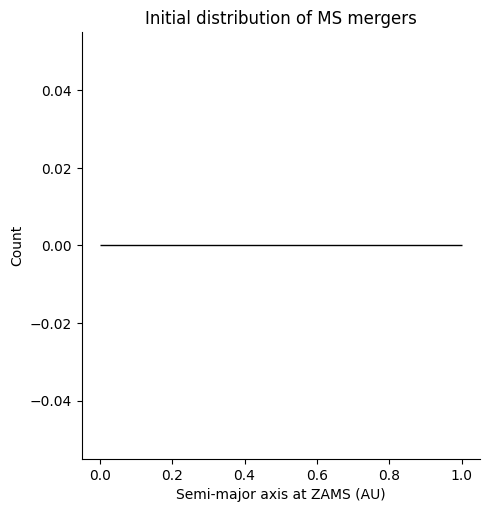

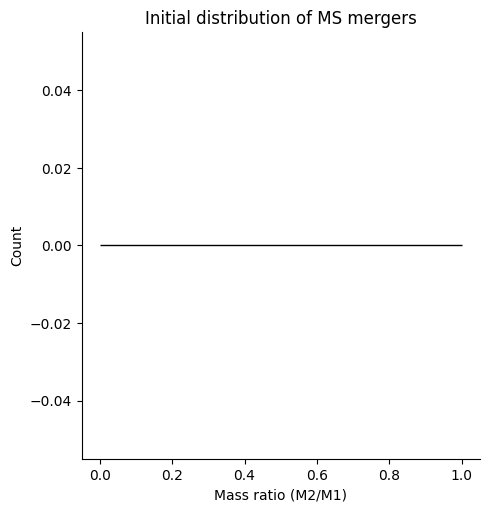

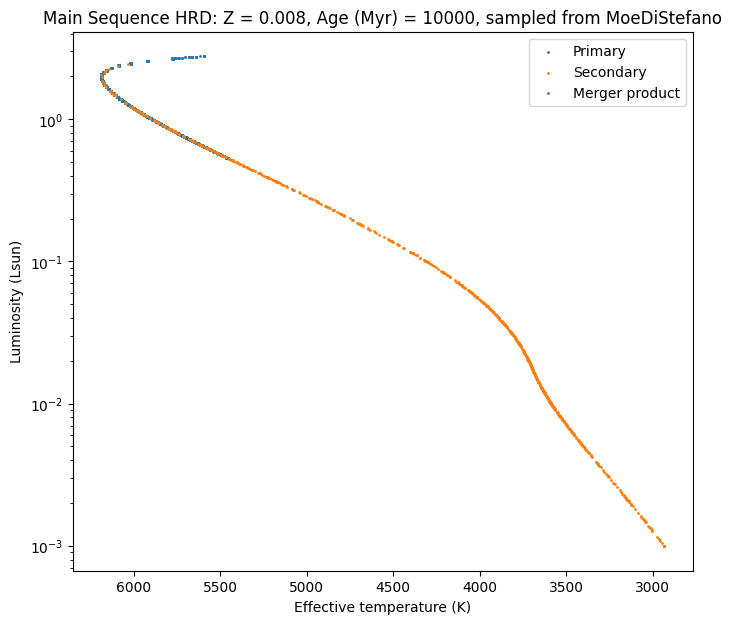

In [29]:
plot_results('COMPAS_Output_sampled_10Gyr.h5', 0.008, 10000, other_info = ', sampled from MoeDiStefano')

Total merger fraction:  0.0672
MS merger fraction:  0.055


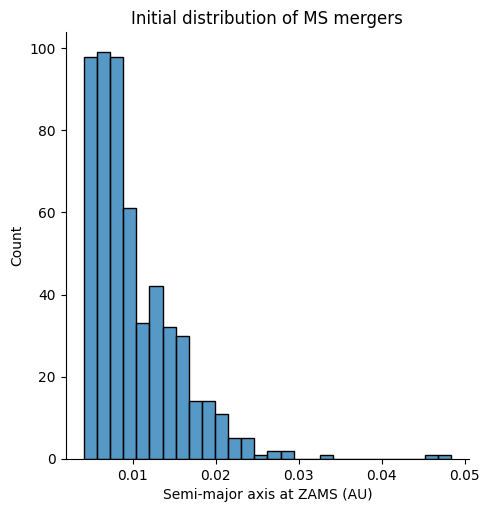

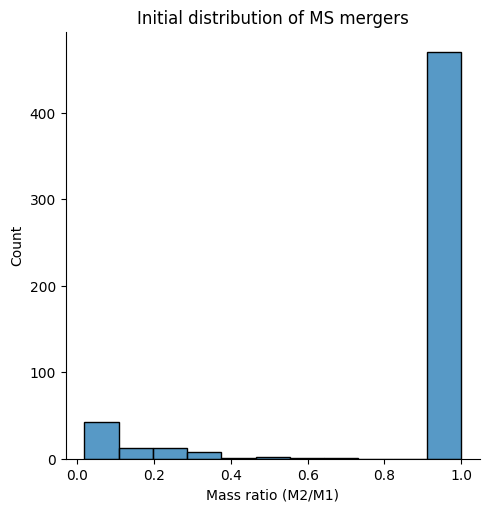

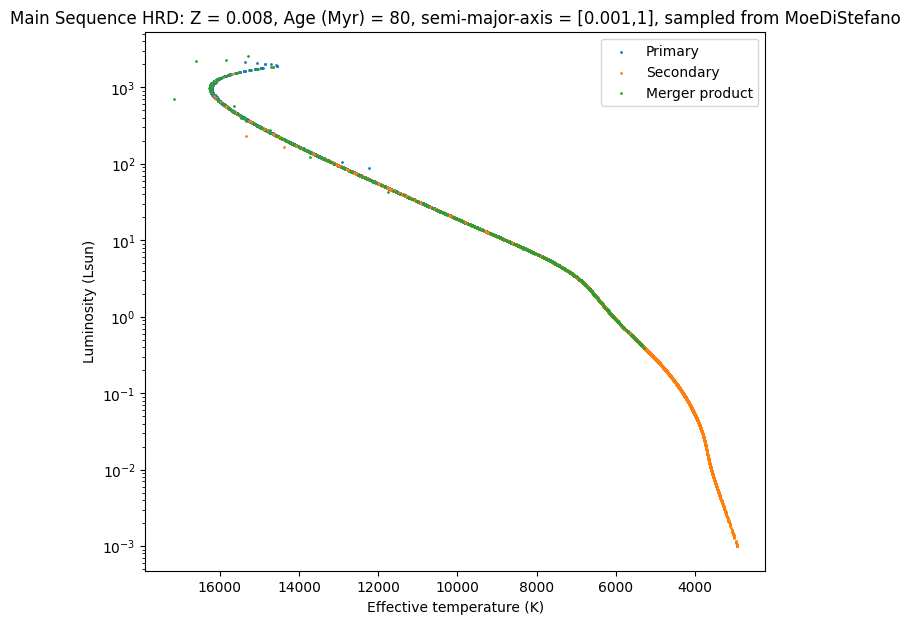

In [30]:
plot_results('COMPAS_Output_sampled_80Myr.h5', 0.008, 80, other_info = ', semi-major-axis = [0.001,1], sampled from MoeDiStefano')

Total merger fraction:  0.0443
MS merger fraction:  0.0001


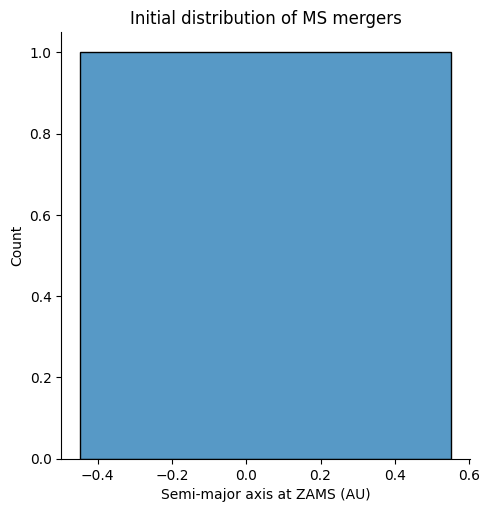

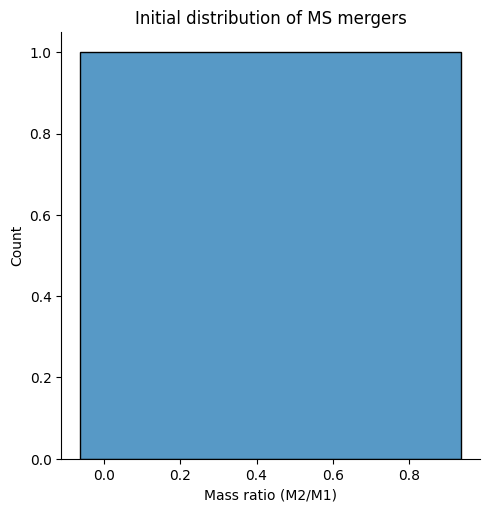

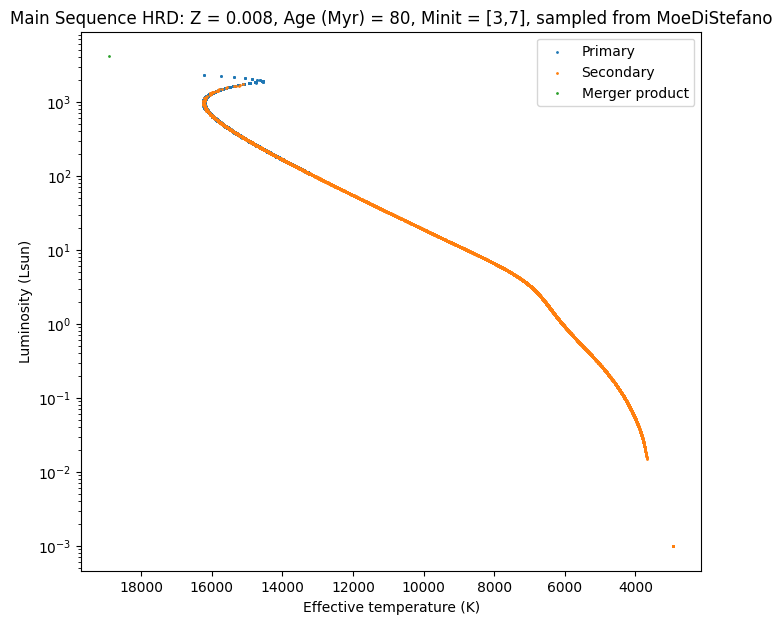

In [31]:
plot_results('COMPAS_Output_sampled_M3to7.h5', 0.008, 80, other_info = ', Minit = [3,7], sampled from MoeDiStefano')

Only 1 out of 10,000 systems merged on MS

Total merger fraction:  0.04778
MS merger fraction:  8e-05


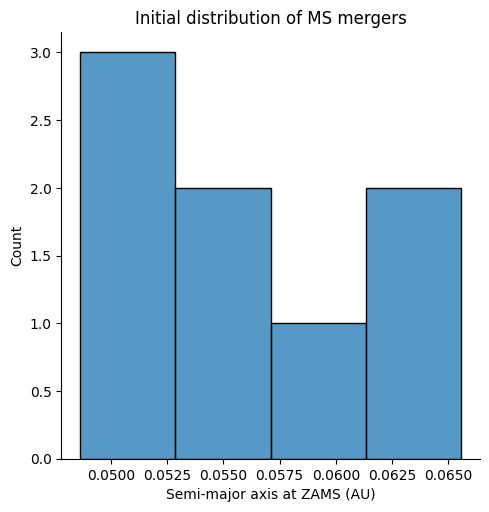

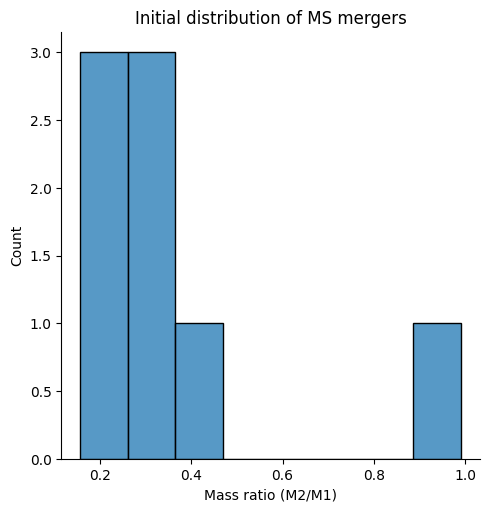

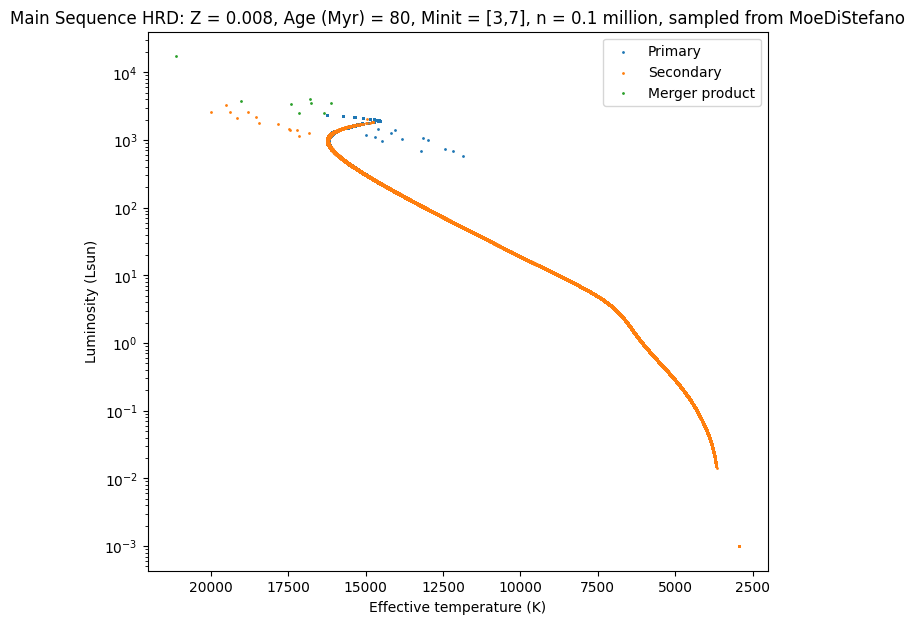

In [32]:
plot_results('COMPAS_Output_sampled_M3to7_0.1mil.h5', 0.008, 80, other_info = ', Minit = [3,7], n = 0.1 million, sampled from MoeDiStefano')